In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv("base_tri.csv")





In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [7]:
column_name = "Quantity"

# Filtrer les lignes où les valeurs de la colonne sont négatives
negative_values = df.loc[df[column_name] < 0]

df2 = negative_values

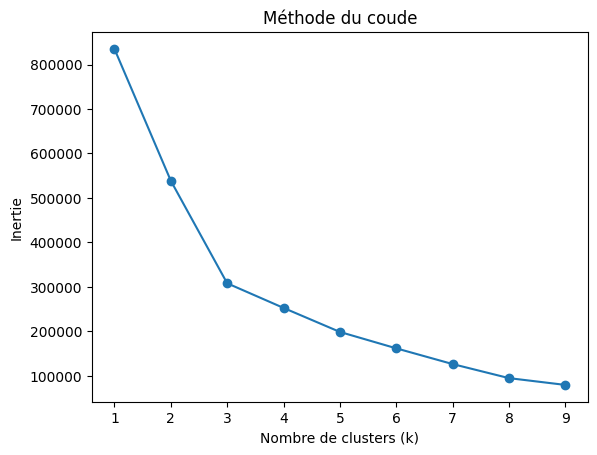

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Étape 1 : Charger les données et sélectionner les colonnes numériques
data = pd.read_csv("base_tri.csv")
numeric_columns = ["Quantity", "Price"]
numeric_data = data[numeric_columns]

# Étape 2 : Prétraitement des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Étape 3 : Choix du nombre de clusters en utilisant la méthode du coude
inertia = []
k_values = range(1, 10)  # Testez différents nombres de clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de la méthode du coude
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


<Axes: xlabel='Quantity', ylabel='Price'>

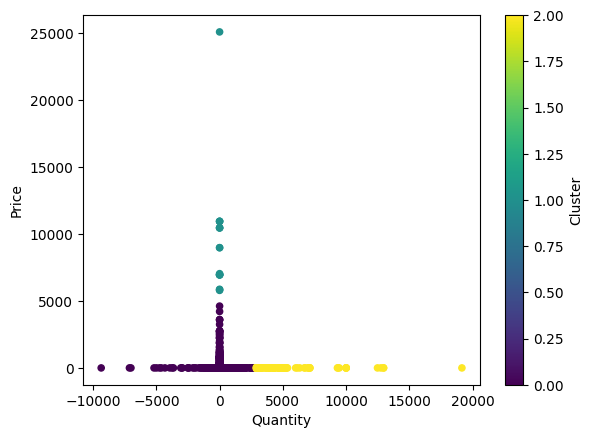

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Étape 1 : Charger les données et sélectionner les colonnes numériques
data = pd.read_csv("base_tri.csv")
numeric_columns = ["Quantity", "Price"]
numeric_data = data[numeric_columns]

# Étape 2 : Prétraitement des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Étape 3 : Choix du nombre de clusters
# Utilisez une méthode comme la méthode du coude ou l'analyse de la silhouette pour trouver le nombre optimal de clusters

# Étape 4 : Appliquer l'algorithme de K-means
k = 3  # Nombre de clusters choisi
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

# Visualisation des résultats (exemple avec deux colonnes numériques)
data["Cluster"] = cluster_labels
data.plot.scatter(x="Quantity", y="Price", c="Cluster", colormap="viridis")
